In [1]:
import numpy as np
import sys
import math 
import random
from numpy.linalg import norm
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
sign = lambda x: math.copysign(1,x)

In [2]:
def batch_algo(X , Y , lr = 1):
    coeff_n=X.shape[1]                              #number of coeffieicients (a0 & b)
    weights= np.random.uniform(low = -1, high = 1, size = (coeff_n,))      #initial weight array (randomized)
    delta=np.ones(coeff_n)                          #delta array (is ones so norm > e)
    e = sys.float_info.epsilon                      #smallest non-zero number
    e_count=0                                       #epoch count
    w_count=0                                       #times the weight has changed
    deltas_plot=[]                                  #array of deltas so we can plot them

    while (norm(delta,1) > e):
        delta=np.zeros(coeff_n)

        for i in range(X.shape[0]):
            u=weights.dot(X[i])
            if (Y[i]* u <=0):
                delta=delta- (Y[i]*X[i])
            
            delta= delta/X.shape[0]
            
            weights=weights-(lr*delta)

            if(not np.all(delta==0)):
                w_count+=1
        deltas_plot.append(delta)        

        e_count+=1            

    return weights,e_count,w_count,deltas_plot    

In [3]:
def online_algo(X , Y , lr = 1):
    coeff_n=X.shape[1]                              #number of coeffieicients (a0 & b)
    weights= np.random.uniform(low = -1, high = 1, size = (coeff_n,))      #initial weight array (randomized)
    delta=np.ones(coeff_n)                          #delta array (is ones so norm > e)
    e = sys.float_info.epsilon                      #smallest non-zero number
    e_count=0                                       #epoch count
    w_count=0                                       #times the weight has changed
    deltas_plot=[]                                  #array of deltas so we can plot them

    while (norm(delta,1) > e):
        delta=np.zeros(coeff_n)

        for i in range(len(X)):
            u=weights.dot(X[i])
            if Y[i]* u <=0:
                delta= delta-(Y[i]*X[i])
                weights=weights-delta/X.shape[0]
                
                if(not np.all(delta==0)): #checks if weight actually changed or stayed the same
                    w_count+=1
        deltas_plot.append(delta)
        e_count+=1

    return weights,e_count,w_count,deltas_plot  

Epochs:  949
Weight Changes: 7584


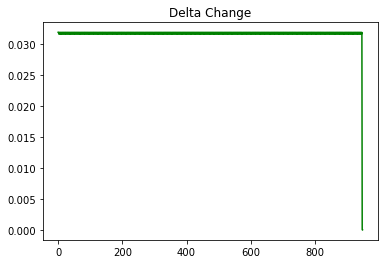

In [4]:
# Problem 1, batch
X = np.array([[50 , 55 , 70 , 80 , 130 , 150 , 155 , 160],
                [1 , 1 , 1 , 1 , 1 , 1 , 1 , 1]]).T

Y = np.array([1 , 1 , 1 , 1 , -1, -1 , -1 , -1])

w , epochs, w_count, delta_plot  = batch_algo( X , Y )

delta_plots=[]
for i in delta_plot:
    delta_plots.append(norm(i,1))

print("Epochs: ", epochs)
print('Weight Changes:', w_count)
plt.title('Delta Change')
plt.plot(delta_plots,'g')


Epochs:  102
Weight Changes: 345


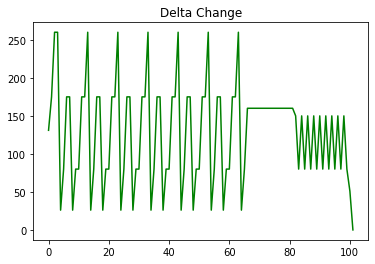

In [5]:
#   problem 1, online
X = np.array([[50 , 55 , 70 , 80 , 130 , 150 , 155 , 160],
                [1 , 1 , 1 , 1 , 1 , 1 , 1 , 1]]).T

Y = np.array([1 , 1 , 1 , 1 , -1, -1 , -1 , -1])

w , epochs, w_count, delta_plot  = online_algo( X , Y )

delta_plots=[]
for i in delta_plot:
    delta_plots.append(norm(i,1))

print("Epochs: ", epochs)
print('Weight Changes:', w_count)
plt.title('Delta Change')
plt.plot(delta_plots,'g')

Epochs:  9
Weight Changes: 64


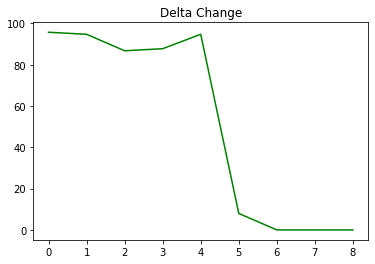

In [12]:
# Problem 4, batch
X = np.array([[0 ,255 ,0 ,0 ,255 ,0 ,255 ,255 ],
                [0 ,0 ,255 ,0 ,255 ,255 ,0 ,255 ],
                [0 ,0 ,0 ,255 ,0 ,255 ,255 ,255 ],
                [1 ,1 ,1 ,1 ,1 ,1 ,1 ,1] ]).T

Y = np.array([1 ,1 ,1 ,-1 ,1 ,-1 ,-1 ,1 ])

w , epochs, w_count, delta_plot  = batch_algo( X , Y )

delta_plots=[]
for i in delta_plot:
    delta_plots.append(norm(i,1))

print("Epochs: ", epochs)
print('Weight Changes:', w_count)
plt.title('Delta Change')
plt.plot(delta_plots,'g')

Epochs:  3
Weight Changes: 8


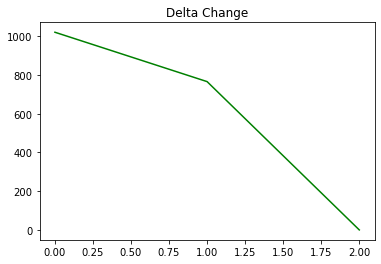

In [17]:
# Problem 4, online
X = np.array([[0 ,255 ,0 ,0 ,255 ,0 ,255 ,255 ],
                [0 ,0 ,255 ,0 ,255 ,255 ,0 ,255 ],
                [0 ,0 ,0 ,255 ,0 ,255 ,255 ,255 ],
                [1 ,1 ,1 ,1 ,1 ,1 ,1 ,1] ]).T

Y = np.array([1 ,1 ,1 ,-1 ,1 ,-1 ,-1 ,1 ])

w , epochs, w_count, delta_plot  = online_algo( X , Y )

delta_plots=[]
for i in delta_plot:
    delta_plots.append(norm(i,1))

print("Epochs: ", epochs)
print('Weight Changes:', w_count)
plt.title('Delta Change')
plt.plot(delta_plots,'g')

In [6]:
# -------------------------------------------Random Data------------------------------------------------------

In [7]:
def data_generator_algo(flag=0):

    x , y = make_classification(25 , n_features=2 , n_redundant = 0,
                            n_informative = 1, n_clusters_per_class = 1)
    mask_for_y = y == 0
    y[mask_for_y] = - 1

    fig, (ax1, ax2) = plt.subplots(2)
    ax1.scatter(x[:,0],x[:,1],marker='o',c=y,s=25,edgecolor='k')
    
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25 , train_size = 0.75)

    if flag==0:             # 0 for batch, 1 for Online
        w , epochs, w_count, delta_plot  = batch_algo( X_train , Y_train )
    else:    
        w , epochs, w_count, delta_plot  = online_algo( X_train , Y_train )
    y_pred = [ ]
    for x in X_test:
        y_pred.append( sign( w.dot(x) ) ) 
        
    accuracy = accuracy_score(Y_test, y_pred)
    
    print("Model Accuracy : ",accuracy*100 ,"%")
    print("Epochs: ", epochs)
    print('Weight Changes:', w_count)
    
    min=X_train.min(axis=0)[0] #getting the minimum in x1, then calculating corresponding x2
    max=X_train.max(axis=0)[0]
    x1 = np.linspace(min , max)
    x2 = x1 * (w[0]/-w[1])

    delta_plots=[]
    for i in delta_plot:
        delta_plots.append(norm(i,1))

    ax1.set_title('Classification')
    ax1.plot(  x1 , x2 )
    ax2.set_title('Delta Change')
    ax2.plot(delta_plots,'g')
    plt.show()


Model Accuracy :  100.0 %
Epochs:  6
Weight Changes: 58


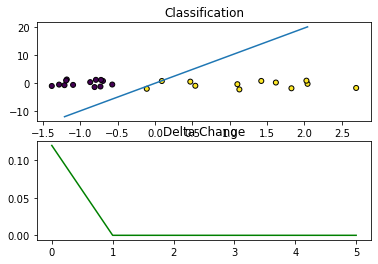

In [8]:
data_generator_algo(0)

Model Accuracy :  100.0 %
Epochs:  9
Weight Changes: 18


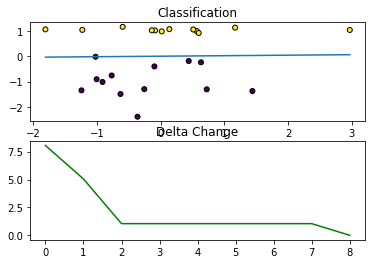

In [9]:
data_generator_algo(1)